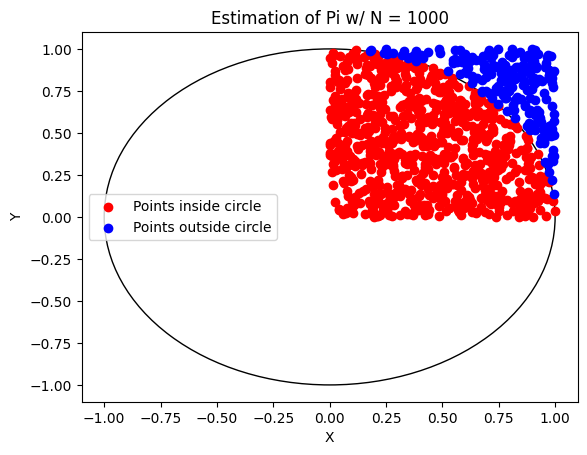

Estimated value of pi w/ N = 1000: 3.156
Uncertainty in estimated pi w/ N = 1000: 0.12649110640673517


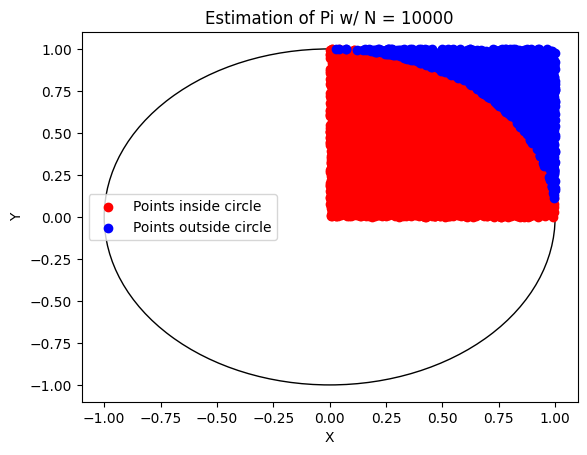

Estimated value of pi w/ N = 10000: 3.1508
Uncertainty in estimated pi w/ N = 10000: 0.04


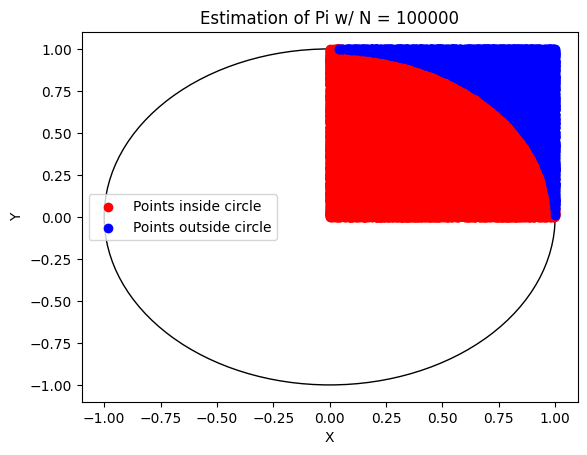

Estimated value of pi w/ N = 100000: 3.13744
Uncertainty in estimated pi w/ N = 100000: 0.012649110640673516


In [7]:
import random
import matplotlib.pyplot as plt

def picalc(N):
    #Creation of lists to hold coordinates & counter
    xpointin = []
    xpointout = []
    ypointin = []
    ypointout = []
    pointsincir = 0

    for i in range(N):
        #Generation of random coordinates within x & y coordinate ranges of [0,1]
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        #Basic definition of a circle & finding if the point lays within the circle
        if (x**2 + y**2) <= 1.0:
            pointsincir += 1
            xpointin.append(x)
            ypointin.append(y)
        else:
            xpointout.append(x)
            ypointout.append(y)
    #Plotted circle centered around (0,0) w/ radius of 1
    circle = plt.Circle((0,0),1,fill=False)
    fig,ax = plt.subplots()
    #Adds circle to subplot
    ax.add_patch(circle)
    plt.scatter(xpointin,ypointin,color='red',label='Points inside circle')
    plt.scatter(xpointout,ypointout,color='blue',label='Points outside circle')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Estimation of Pi w/ N = {N}')
    plt.legend()
    plt.show()

    #Pi approximation
    #Ratio of points inside circle to the total points generated should be approximately equal to the ratio of the area of the unit circle to the area of the square (pi/4)
    #Pi can thus be found by multiplying the ratio of points by 4
    approxpi = 4 * pointsincir/N
    uncertainty = 4/(N ** 0.5)
    print(f'Estimated value of pi w/ N = {N}: {approxpi}')
    print(f'Uncertainty in estimated pi w/ N = {N}: {uncertainty}')
picalc(1000)
picalc(10000)
#Not sure if typo or we just skip 100k, but I only put 100k, since 1000k takes a while
picalc(100000)
#Discussion, the value of pi does in fact get closer & closer to 3.1415926. Additionally, the uncertainty becomes smaller as N gets bigger since it's the sqrt(N)
#Thus, scaling rule of uncertainty is followed

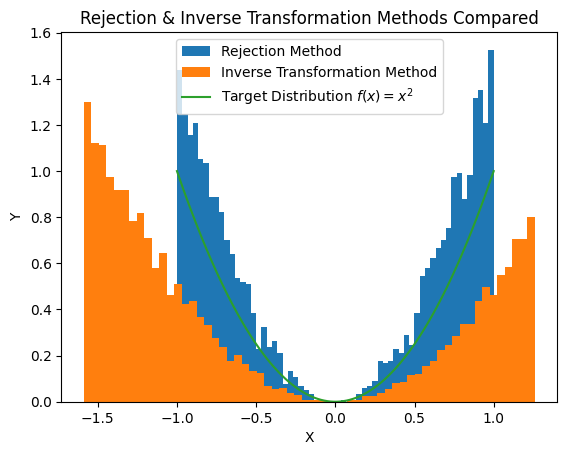

Total random numbers for rejection method: 3421
Total random numbers for inverse transformation method: 10000


In [39]:
import numpy as np

#Rejection method
def f(x):
    return x ** 2
xrej = []
for i in range(10000):
    x_i = random.uniform(-1,1)
    #f(x) = x^2, f(1) = 1
    y_i = random.uniform(0,1)
    if y_i < f(x_i):
        xrej.append(x_i)
#Inverse transformation method
#CDF of f(x) -> integral of f(x) = x^2 -> x^3/3
#Inverse means solving for x -> x = (3y)^(1/3)
yinv = np.random.uniform(-1,1,10000)
def inversetrans(y):
    return np.cbrt(3 * y - 1)
xinv=inversetrans(yinv)

#Visualized comparison
#Setting up target distribution function
xval = np.linspace(-1,1,100)
plt.hist(xrej,bins=60,density=True,label='Rejection Method')
plt.hist(xinv,bins=60,density=True,label='Inverse Transformation Method')
plt.plot(xval,f(xval),label='Target Distribution $f(x) = x^2$')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rejection & Inverse Transformation Methods Compared')
plt.legend()
plt.show()
print(f'Total random numbers for rejection method: {len(xrej)}')
print(f'Total random numbers for inverse transformation method: 10000')
#The rejection method uses less random numbers, but seems to be somewhat less accurate than the inverse transformation method 